In [3]:
#this strategy generates trade signals based on the percentage change between btc and eth close prices.
#This distribution seems to be normal, so we generate a buy / sell signal when the percentage change is higher than a given threshold.

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
#read in the OHLCV data we collected from binance (1hr frequency, 2017-2020).
btc_usdt = pd.read_csv("Binance_BTCUSDT_1h.csv", header=1)
eth_usdt = pd.read_csv("Binance_ETHUSDT_1h.csv", header=1)

#preprocessing the df to reverse dates and reset index
eth_usdt = eth_usdt[::-1].reset_index()
btc_usdt = btc_usdt[::-1].reset_index()
btc_usdt.drop(['index'], axis=1, inplace=True)
eth_usdt.drop(['index'], axis=1, inplace=True)
btc_usdt.head(-5)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT
0,1.502942e+09,2017-08-17 04-AM,BTCUSDT,16199.91,16199.91,4261.32,4308.83,44.5100,190952.85
1,1.502946e+09,2017-08-17 05-AM,BTCUSDT,4308.83,4328.69,4291.37,4315.32,23.2300,100304.82
2,1.502950e+09,2017-08-17 06-AM,BTCUSDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31
3,1.502953e+09,2017-08-17 07-AM,BTCUSDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06
4,1.502957e+09,2017-08-17 08-AM,BTCUSDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70
...,...,...,...,...,...,...,...,...,...
27090,1.600466e+09,2020-09-18 10-PM,BTCUSDT,10939.63,10944.79,10919.07,10928.04,1151.4600,12585915.04
27091,1.600470e+09,2020-09-18 11-PM,BTCUSDT,10928.04,10937.02,10884.38,10933.39,1425.7700,15559167.50
27092,1.600474e+09,2020-09-19 12-AM,BTCUSDT,10933.39,10974.03,10929.88,10972.79,1589.9600,17415457.61
27093,1.600477e+09,2020-09-19 01-AM,BTCUSDT,10972.79,10974.03,10934.20,10945.49,1283.4000,14053270.80


btcusdt close 2017/08 -> 2020/09:
 0         4308.83
1         4315.32
2         4324.35
3         4349.99
4         4360.69
           ...   
27095    10976.00
27096    10956.67
27097    10933.44
27098    10944.82
27099    10940.00
Name: Close, Length: 27100, dtype: float64 

 btcusdt returns 2017/08 -> 2020/09:
 0             NaN
1        0.001506
2        0.003602
3        0.009552
4        0.012036
           ...   
27095    1.547327
27096    1.542841
27097    1.537450
27098    1.540091
27099    1.538972
Name: Returns, Length: 27100, dtype: float64


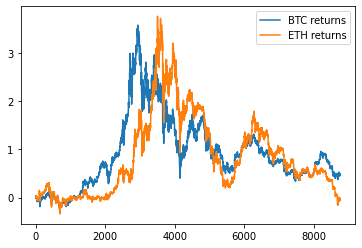

In [4]:
import matplotlib.pyplot as plt
#Calculate the cumulative returns from 2017 to 2020 and plot it.
btc_usdt['Returns'] = np.cumprod(1 + btc_usdt['Close'].pct_change()) -1
eth_usdt['Returns'] = np.cumprod(1 + eth_usdt['Close'].pct_change()) -1

plt.plot(btc_usdt['Returns'][:8760], label='BTC returns')
plt.plot(eth_usdt['Returns'][:8760], label='ETH returns')
plt.legend()


print('btcusdt close 2017/08 -> 2020/09:\n', btc_usdt['Close'], '\n\n',
      'btcusdt returns 2017/08 -> 2020/09:\n', btc_usdt['Returns'])

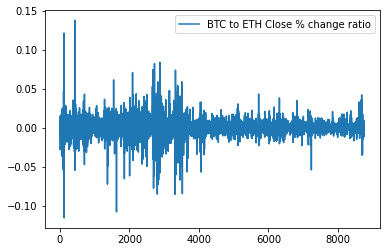

In [5]:
#Calculate the percent change between bitcoin and eth close prices and plot it.
btc_usdt['btc/eth ratio'] = (btc_usdt['Close'] / eth_usdt['Close']).pct_change()
plt.plot(btc_usdt['btc/eth ratio'][:8760], label='BTC to ETH Close % change ratio')
plt.legend()

<ipython-input-6-36aa6f4d8f9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_usdt['normalised ratio'][1:8761] = stats.zscore(btc_usdt['btc/eth ratio'][1:8761]) #0 index is nan
/home/tim/anaconda3/envs/algotrading/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


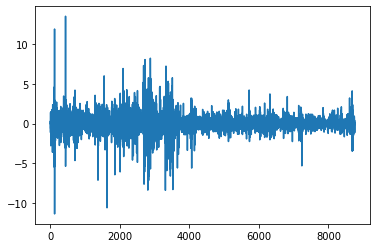

In [6]:
#Calculate the std. dev between the close change ratio and normalize using zscore, then plot.
from scipy import stats
#btc_usdt.head(10)
np.std(btc_usdt['btc/eth ratio'][:8760])
btc_usdt['btc/eth ratio'].head()
btc_usdt['normalised ratio'] = 0
btc_usdt['normalised ratio'][1:8761] = stats.zscore(btc_usdt['btc/eth ratio'][1:8761]) #0 index is nan
plt.plot(btc_usdt['normalised ratio'][:8760])

In [7]:
#Calculate percentage of deviation above 2
btc_usdt[btc_usdt['normalised ratio'] > 2].groupby('normalised ratio')['normalised ratio'].count()
percentage = len(btc_usdt[btc_usdt['normalised ratio'] > 1].groupby('normalised ratio')['normalised ratio'].count()) / len(btc_usdt['normalised ratio'][:8760])
percentage * 100

8.561643835616438

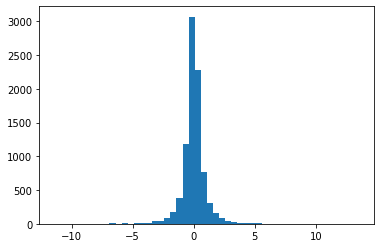

In [8]:
#Plot to see the distribution characteristics of the normalised ratio
btc_usdt['normalised ratio'].dropna()
test = btc_usdt['normalised ratio'][:8760].values
plt.hist(test[np.isfinite(test)], bins=50)
plt.show()

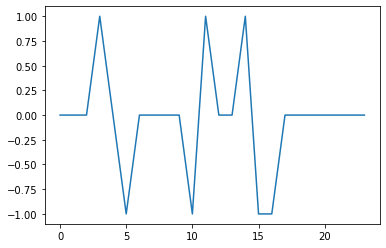

In [9]:
#turn our data into trading signals.

signals = pd.DataFrame(index=range(0, 8760))

# -1 = sell, 1 = buy, 0 = hold

i = 0
signals['data'] = 0

for row in test[np.isfinite(test)][:8760]:
    if row > 1:
        signals['data'][i] = -1
        
    elif row < -1:
        signals['data'][i] = 1
    else:
        signals['data'][i] = 0
        
    i = i + 1
    
plt.plot(signals[:24])